In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as tb

In [2]:
sun = yf.Ticker('ADANIPORTS.NS')
data = sun.history(period='2000d')

In [3]:
data = data.drop(columns=['Dividends','Stock Splits'])

In [4]:
# Simple Moving Average
data['Close_SMA'] = tb.SMA(data.Close, timeperiod = 20)
# Exponential Moving Average
data['Close_EMA'] = tb.EMA(data.Close, timeperiod = 20)
# On Balance Volume
data['OBV'] = tb.OBV(data.Close, data.Volume)/10**6
# Relative Strenght Index
data['RSI'] = tb.RSI(data.Close, timeperiod = 14)
# Average Directional Movement Index
data['ADX'] = tb.ADX(data.High,data.Low,data.Close,timeperiod=14)

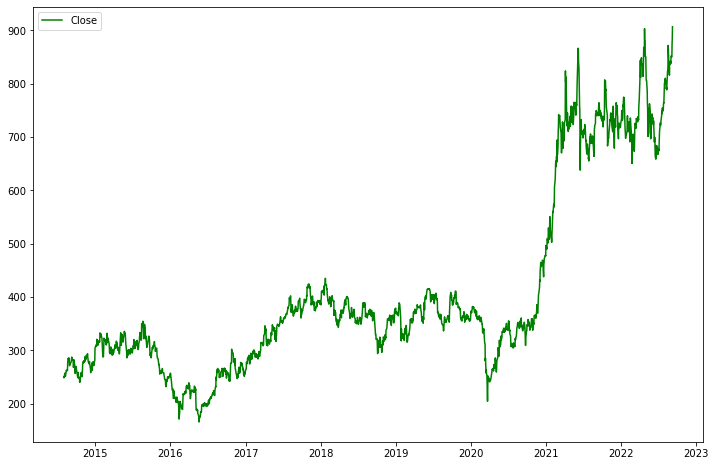

In [5]:
plt.figure(figsize=(12,8))
plt.plot(data.Close, color='g')
plt.legend(['Close'])
plt.show()

In [6]:
data = data.filter(['Close','Volume','OBV','ADX'])
data = data.dropna()
data = data.reset_index()

In [7]:
data['Shares'] = 0
data['Money'] = 0
data.iloc[0,6] = 10000

In [8]:
print(data.head())
print(data.shape[0])

        Date       Close   Volume        OBV        ADX  Shares  Money
0 2014-09-10  281.548065  3601230  57.251655  28.419677       0  10000
1 2014-09-11  281.548065  1911504  57.251655  27.554223       0      0
2 2014-09-12  281.596008  2602822  59.854477  27.293818       0      0
3 2014-09-15  279.964996  1273200  58.581277  26.328240       0      0
4 2014-09-16  268.355743  2068845  56.512432  24.927140       0      0
1972


In [9]:
for index in range(data.shape[0]):
    if index != 0:
        cls = data.iloc[index,1]
        vol = data.iloc[index,2]
        obv = data.iloc[index,3]
        obv2 = data.iloc[index-1,3]
        adx = data.iloc[index,4]
        shares = data.iloc[index-1,5]
        money = data.iloc[index-1,6]
        
        sha = 0
        mon = 0
        
        if obv > obv2:  #buy
            
            if adx > 75:           #try buying 5 shares
                
                if (money > 5*cls):
                    sha = 5
                    mon = mon - 5*cls
                    
                elif (money > 3*cls):
                    sha = 3
                    mon = mon - 3*cls
                    
                elif (money > cls):
                    sha = 1
                    mon = mon - cls
                    
                else:
                    sha = 0
                    mon = 0
                
            if adx > 50:         #try buying 2 shares 
                
                if (money > 2*cls):
                    sha = 2
                    mon = mon - 2*cls
                    
                elif (money > cls):
                    sha = 1
                    mon = mon - cls
                    
                else:
                    sha = 0
                    mon = 0
                
            if adx > 30:            #try buying 1 share
                    
                if (money > cls):
                    sha = 1
                    mon = mon - cls
                    
                else:
                    sha = 0
                    mon = 0 
            
        elif obv < obv2: #sell
            
            if adx > 75:            #try selling 5 shares
                
                if (shares >= 5):
                    sha = -5
                    mon = mon + 5*cls
                 
                elif (shares >= 3):
                    sha = -3
                    mon = mon + 3*cls
                    
                elif (shares >= 1):
                    sha = -1
                    mon = mon + cls
                    
                else:
                    sha = 0
                    mon = 0
                    
            if adx > 50: 
                
                if (shares >= 3):
                    sha = -3
                    mon = mon + 3*cls
                    
                elif (shares >= 1):
                    sha = -1
                    mon = mon + cls
                    
                else:
                    sha = 0
                    mon = 0
                    
            if adx > 25:
                
                if (shares >= 1):
                    sha = -1
                    mon = mon + cls
                    
                else:
                    sha = 0
                    mon = 0
                    
        data.iloc[index,5] = shares + sha
        data.iloc[index,6] = money + mon
                

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(data)

           Date       Close    Volume         OBV        ADX  Shares  \
0    2014-09-10  281.548065   3601230   57.251655  28.419677       0   
1    2014-09-11  281.548065   1911504   57.251655  27.554223       0   
2    2014-09-12  281.596008   2602822   59.854477  27.293818       0   
3    2014-09-15  279.964996   1273200   58.581277  26.328240       0   
4    2014-09-16  268.355743   2068845   56.512432  24.927140       0   
5    2014-09-17  270.994202   2458969   58.971401  24.375570       0   
6    2014-09-18  282.651428   3210047   62.181448  22.916465       0   
7    2014-09-19  273.392822   3571431   58.610017  21.561583       0   
8    2014-09-22  274.208282   1729402   60.339419  20.108012       0   
9    2014-09-23  262.023407   2629647   57.709772  19.698267       0   
10   2014-09-24  257.370148   5118762   52.591010  20.265275       0   
11   2014-09-25  257.034332   5305786   47.285224  20.791781       0   
12   2014-09-26  268.595581   3311604   50.596828  19.967832    

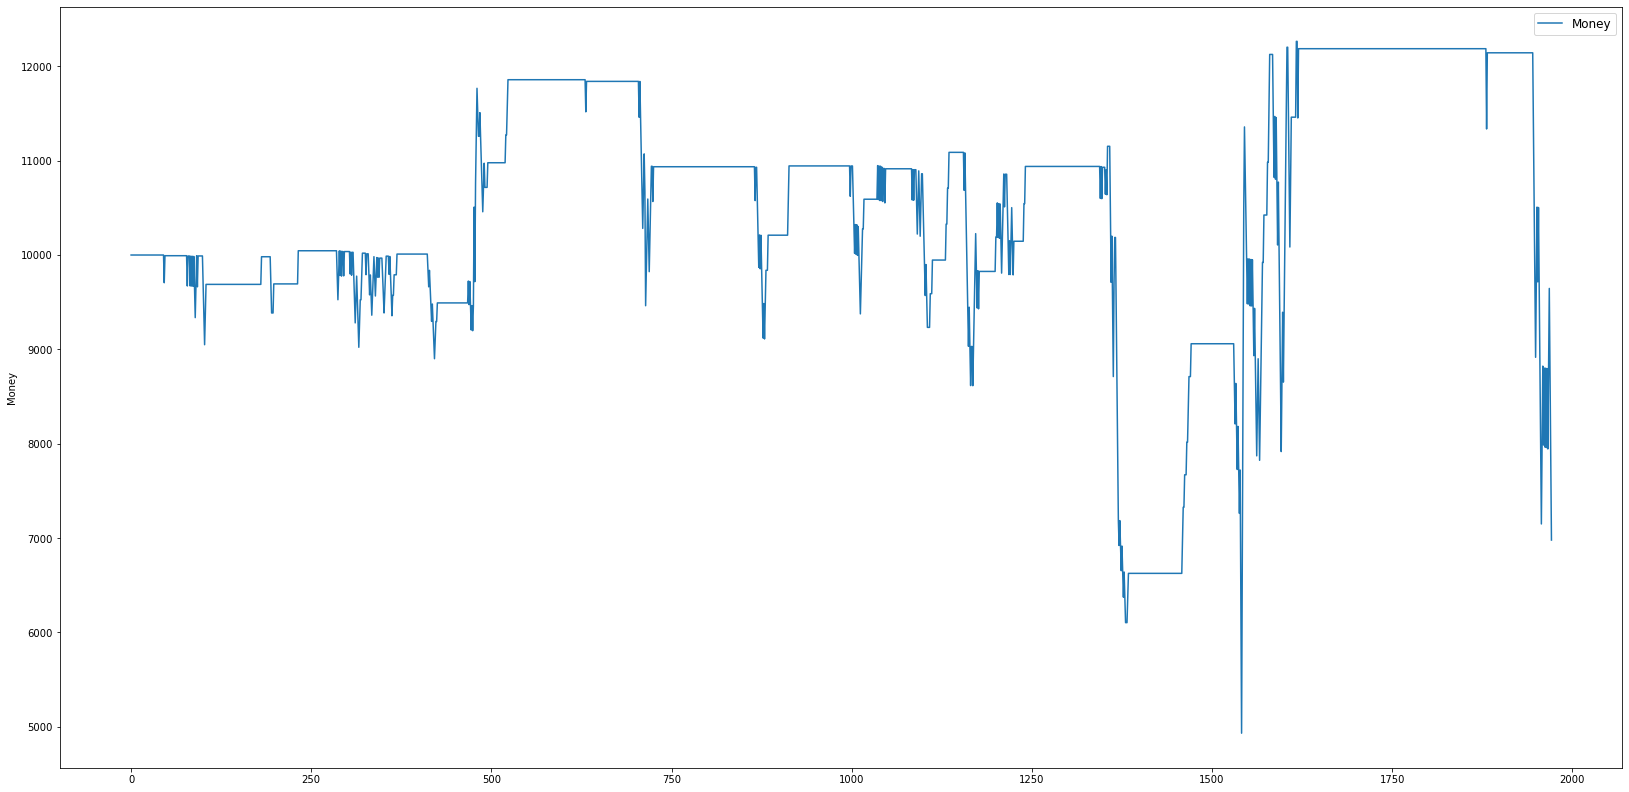

In [11]:
plt.figure(figsize=(28,14))
plt.plot(data.index, data['Money'], label='Money')
plt.legend(loc = 'upper right', fontsize = 12)
plt.ylabel('Money')
plt.show()